# Exploring K-Means Clustering for Handwriting Recognition

Handwriting recognition has been revolutionized by machine learning, with applications ranging from postal services to ATMs and productivity tools. Algorithms like K-means clustering play a critical role in deciphering handwritten text efficiently. This project demonstrates how to use scikit-learn and K-means clustering to group and analyze handwritten digit images.

Link: https://www.govexec.com/federal-news/1999/02/postal-service-tests-handwriting-recognition-system/1746/

## Importing the Digits Dataset from Scikit Learn
Let's import the digits dataset and have an initial look at it

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape, digits)


(1797, 64) {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pi

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
print(digits.target)

[0 1 2 ... 8 9 8]


## Image Visualisation
Let's visualise the image located at index 100 for example

<Figure size 640x480 with 0 Axes>

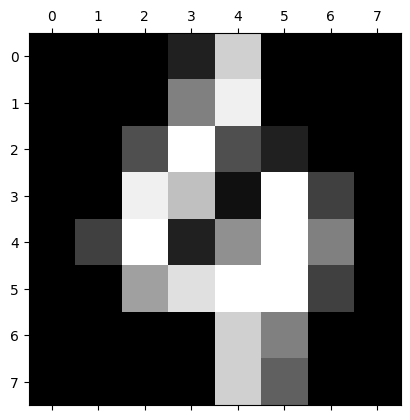

In [7]:
plt.gray() 

plt.matshow(digits.images[100])

plt.show()


In [8]:
# Which digit is this? Let's figure it out by printing the target value of the 100th digit.

print(digits.target[100])


4


## K-Means Clustering

In [9]:
# With a clear understanding of our dataset, it's time to organize the 1,797 digit images into distinct clusters.
from sklearn.cluster import KMeans

# How many clusters do we need?
# We know that there are 10 unique digits in the dataset, so there should be 10 clusters.
seed = 42
model = KMeans(n_clusters=10, random_state=seed)


In [10]:
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

## K-Means visualisation
Let’s explore the centroids visually! In the 64-dimensional space where the data resides, each centroid holds values that can be transformed into images for better understanding.

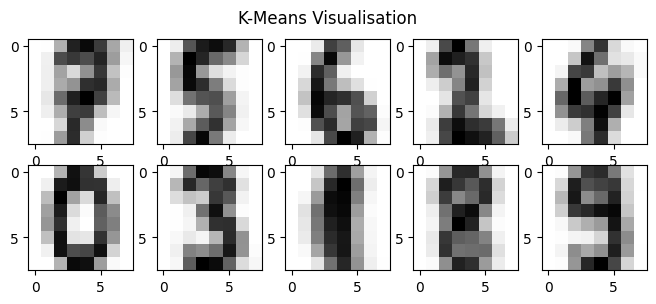

In [11]:
# Create a figure of size 8x3
fig = plt.figure(figsize=(8, 3))

# Add a title
fig.suptitle("K-Means Visualisation")


for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

  #note: The cluster centers consist of 64 values ranging from 0 to 16. In this step, each center is reshaped into an 8x8 two-dimensional array.
plt.show()


## Testing the model


In [16]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.08,0.53,0.00,0.00,0.00,0.00,0.00,3.26,6.70,7.40,0.00,0.00,0.00,0.75,5.71,7.62,6.55,2.51,0.00,0.00,0.00,4.86,7.62,7.62,7.62,7.08,1.07,0.00,0.00,6.09,6.47,3.11,3.72,7.62,2.28,0.00,0.00,4.94,7.54,4.87,6.16,7.54,1.07,0.00,0.00,0.45,4.71,6.78,6.62,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.28,4.72,6.02,7.31,4.88,0.00,0.00,2.73,7.62,6.93,5.64,4.26,1.67,0.00,0.15,7.01,6.77,3.12,3.04,3.05,2.28,0.00,0.76,7.62,7.62,7.62,7.62,7.62,7.62,4.03,0.76,7.62,6.24,2.12,0.00,0.22,6.24,6.86,0.23,7.14,5.77,0.08,0.60,3.86,7.38,5.86,0.00,3.13,7.62,6.47,7.31,7.62,5.68,0.76],
[0.00,0.00,0.00,0.15,1.22,1.52,0.83,0.00,0.00,1.89,6.48,7.62,7.62,7.62,6.64,0.00,0.00,5.94,6.70,3.44,2.74,1.90,1.60,0.00,1.21,7.62,3.95,1.75,2.29,2.28,2.29,1.67,2.28,7.62,7.62,7.62,7.62,7.62,7.62,7.62,1.06,7.62,5.71,2.50,1.83,5.09,7.40,7.61,0.00,5.79,7.47,5.18,7.24,7.47,5.25,2.66,0.00,0.45,4.86,6.10,5.18,1.14,0.00,0.00],
[0.00,0.00,0.00,2.20,5.94,7.54,7.55,1.15,0.00,0.00,3.42,7.62,6.47,4.03,2.97,0.23,0.00,1.29,7.62,6.39,1.74,0.53,0.00,0.00,0.38,6.55,7.62,7.62,7.62,7.62,4.03,0.00,2.81,7.62,2.96,1.52,2.04,6.09,5.94,0.00,3.94,7.54,2.05,0.00,0.00,4.87,6.70,0.00,1.44,6.78,7.62,6.86,5.26,6.93,5.18,0.00,0.00,0.38,2.81,4.65,6.48,6.70,2.35,0.00]
]) # This array represents the number 2045 written by hand

new_labels = model.predict(new_samples)

#We need to map the predicted labels to the actual digit names.

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')


# Final thoughts: the model has been trained with only 2k samples (approx) from handwritten numbers of turkish people from the 2990. If we would like to improve the models accuracy, we would need to train it with more samples


0383